In [1]:
# importing the  python libraries :
import pandas as pd # used for data cleaning and exploratory data analysis.
import seaborn as sns # used for making interactive and beautiful charts and graphs.
import matplotlib.pyplot as plt # used to plot charts and graphs.


In [4]:
# import file:
df = pd.read_csv(r"C:\Row_Dataset_fill\index_1.csv")

In [ ]:
df.head(5) #  Display the first 5 rows of the DataFrame

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
df.info()# Display summary information about the DataFrame (column names, non-null counts, data types, memory usage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [ ]:
df.isnull().sum()# Show the total number of missing (null/NaN) values in each column of the DataFrame

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [ ]:
df["card"] = df["card"].fillna("Cash") # Replace all missing (NaN) values in the 'card' column with the string 'Cash'

In [ ]:
df["datetime"] = pd.to_datetime(df["datetime"])  # Convert the 'datetime' column to proper datetime format for time-based operations


In [ ]:
df["time"] = df["datetime"].dt.strftime("%H:%M") # Create a new 'time' column with hour and minute in HH:MM format from 'datetime'

,date,datetime,cash_type,card,money,coffee_name,time
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10:15
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:19
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:20
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13:46
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13:48
...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino,10:34
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa,14:43
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa,14:44
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano,15:47


In [73]:
df["money"]=df["money"].round(2)# Round all values in the 'money' column to 2 decimal places

In [43]:
# Group the data by 'time', sum the 'money' for each time slot,
# sort the total sales in descending order,
# reset the index to get a clean DataFrame,
# and select the top 15 time slots with the highest sales
Time_cash_sale = df.groupby("time")["money"].sum().sort_values(ascending= False).reset_index().head(15)

In [44]:
Time_cash_sale.head(10) # Display the top 10 time slots with the highest total sales

,time,money
0,10:12,392.86
1,16:18,329.18
2,17:12,325.26
3,10:18,321.00
4,21:18,320.36
5,10:05,312.82
6,18:13,312.52
7,16:55,309.58
8,19:10,308.12
9,10:42,306.64


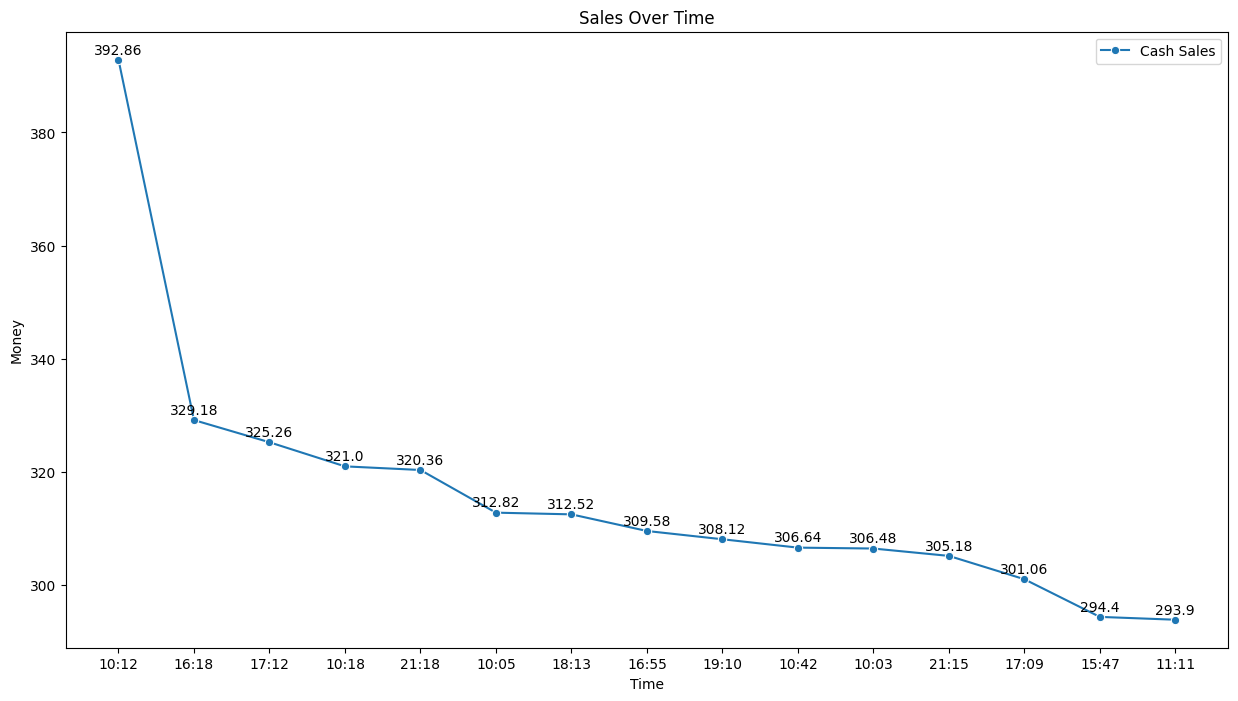

In [ ]:

# Set the size of the plot
plt.figure(figsize=(15, 8))
# Plot a line graph showing total sales by time
ax = sns.lineplot(x="time", y="money", data=Time_cash_sale, label="Cash Sales", marker="o")
# Set the title and axis labels
plt.title("Sales Over Time") 
plt.xlabel("Time")# X-axis label
plt.ylabel("Money")# Y-axis label
plt.legend() # Show legend for the line label

# ✅ Add value labels to each point
for x, y in zip(Time_cash_sale["time"], Time_cash_sale["money"]):
    plt.text(x, y + 0.5, f'{y}', ha='center', va='bottom', fontsize=10)

plt.show()
  



In [ ]:
df["date"]= pd.to_datetime(df["date"]) # Convert the 'date' column to proper datetime format for date-based operations

In [ ]:
# Group the data by 'date', calculate total sales ('money') for each date,
# sort the sales in descending order,
# reset the index to convert the Series into a clean DataFrame,
# and select the top 20 dates with the highest total sales
year_sales = df.groupby("date")["money"].sum().sort_values(ascending=False).reset_index().head(20)

In [68]:
year_sales

,date,money
0,2024-10-11,836.66
1,2025-02-03,796.00
2,2025-02-05,760.24
3,2025-03-03,737.72
4,2024-10-17,726.46
5,2025-02-24,723.02
6,2025-03-14,704.88
7,2025-02-21,695.08
8,2024-09-22,679.88
9,2025-02-10,662.76


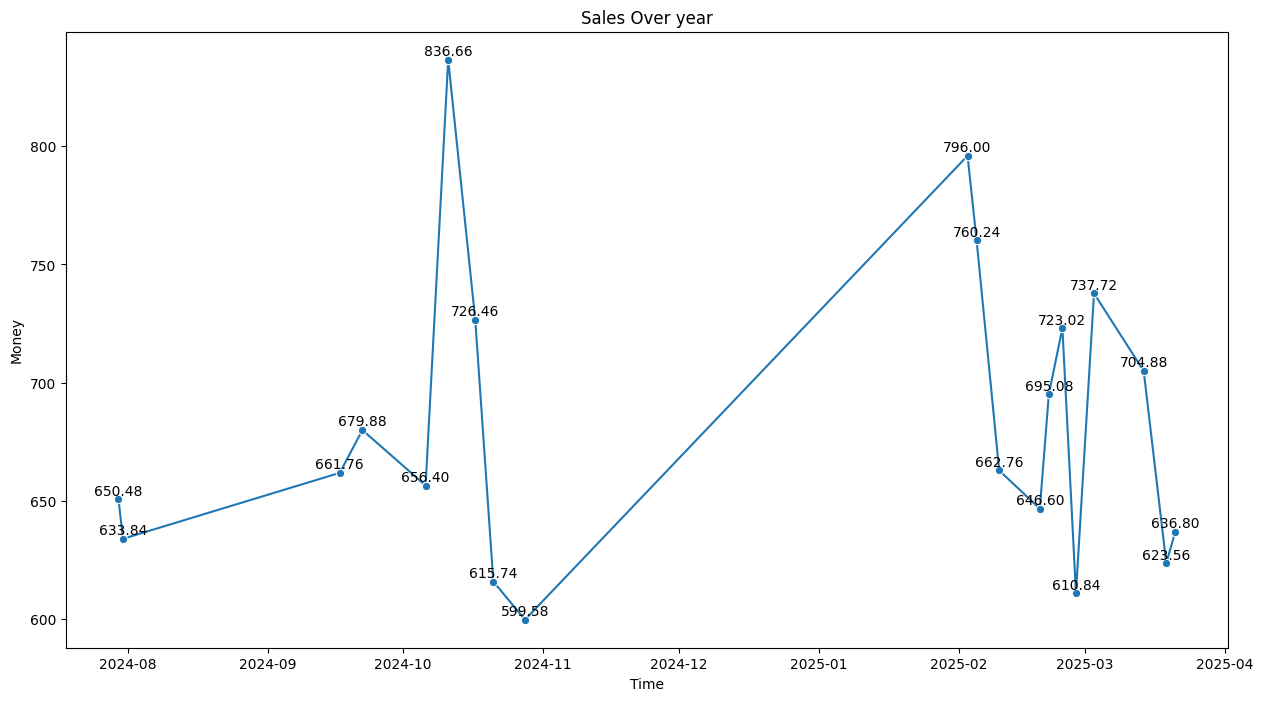

In [ ]:
# Set the size of the plot
plt.figure(figsize=(15, 8))
# Plot a line graph showing total sales by time
ax = sns.lineplot(x="date", y="money", data= year_sales, marker="o")
# Set the title and axis labels
plt.title("Sales Over year")
plt.xlabel("Time")
plt.ylabel("Money")

# ✅ Add value labels to each point
for x, y in zip(year_sales["date"], year_sales["money"]):
    plt.text(x, y + 0.5, f'{y:,.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:
# Create a pivot table that groups data by 'cash_type',
# calculates the total sum of 'money' for each cash type,
# and resets the index to return a clean DataFrame
pivod_By_Type = pd.pivot_table(df, index= "cash_type" , values= "money" , aggfunc= { "money" : "sum" }).reset_index()

In [91]:
pivod_By_Type

,cash_type,money
0,card,112245.58
1,cash,3186.00


In [ ]:
# Create a pivot table that groups data by 'date',
# calculates the total sum of 'money' (sales) for each date,
# and resets the index to return a clean and readable DataFrame

pivod_date = pd.pivot_table(df, index= "date" , values= "money" , aggfunc= { "money" : "sum" }).reset_index()

In [93]:
pivod_date

,date,money
0,2024-03-01,396.30
1,2024-03-02,228.10
2,2024-03-03,349.10
3,2024-03-04,135.20
4,2024-03-05,338.50
...,...,...
376,2025-03-19,623.56
377,2025-03-20,597.60
378,2025-03-21,636.80
379,2025-03-22,365.42


In [94]:
df

,date,datetime,cash_type,card,money,coffee_name,time
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10:15
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:19
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:20
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13:46
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13:48
...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino,10:34
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa,14:43
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa,14:44
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano,15:47


In [ ]:
# Create a pivot table that groups data by 'coffee_name',
# calculates the total sum of 'money' (sales) for each coffee type,
# sorts the results in descending order of total sales,
# and resets the index to return a clean and sorted DataFrame
pivod_by_coffee = pd.pivot_table(df, index= "coffee_name", values= "money", aggfunc= {"money": "sum"}).sort_values( by= "money" ,ascending= False).reset_index()

In [103]:
pivod_by_coffee

,coffee_name,money
0,Latte,27866.30
1,Americano with Milk,25269.12
2,Cappuccino,18034.14
3,Americano,15062.26
4,Hot Chocolate,10172.46
5,Cocoa,8678.16
6,Cortado,7534.86
7,Espresso,2814.28


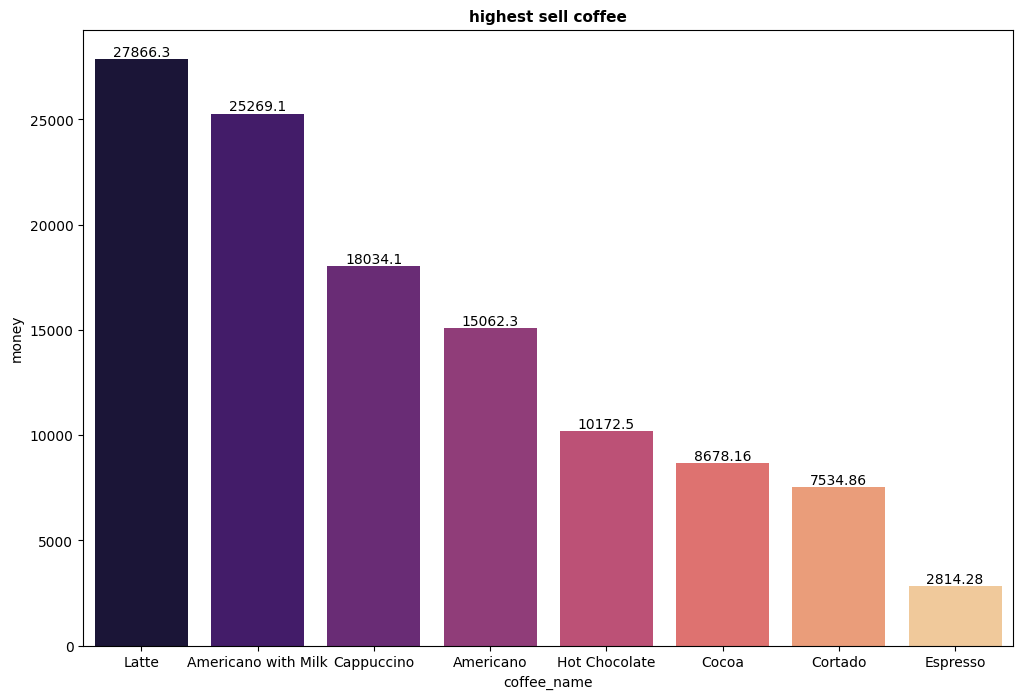

In [ ]:
# Set the size of the plot
plt.figure(figsize= (12,8))
# Create a barplot showing total sales for each coffee type
ax= sns.barplot(x= "coffee_name", y= "money", data= pivod_by_coffee , palette= "magma", hue= "coffee_name")
# Add a title to the chart
plt.title("highest sell coffee", fontsize = 11 , fontweight = "bold")
# Add value labels on top of each bar
[plt.bar_label(container) for container in ax.containers]
plt.show()